### Step1- Importing the Library and Packages

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


### Step2- Load the file 

In [3]:
df=pd.read_csv("Facebook_Marketplace_data.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [8]:
#Display the datatype and missing values count
print(df.info())
print("\nMissing values count:\n", df.isnull().sum())
print("Shape of the dataset:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

### Step 3- Handling Missing Values

In [9]:
#Since the Column1,Column2,Column3,Column4 do not contain any information,  Dropping these columns
df.drop(columns=['Column1','Column2','Column3','Column4'],inplace=True,errors='ignore')
print(df.head())
print(df.shape)

   status_id status_type status_published  num_reactions  num_comments  \
0          1       video   4/22/2018 6:00            529           512   
1          2       photo  4/21/2018 22:45            150             0   
2          3       video   4/21/2018 6:17            227           236   
3          4       photo   4/21/2018 2:29            111             0   
4          5       photo   4/18/2018 3:22            213             0   

   num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys  
0         262        432         92         3          1         1           0  
1           0        150          0         0          0         0           0  
2          57        204         21         1          1         0           0  
3           0        111          0         0          0         0           0  
4           0        204          9         0          0         0           0  
(7050, 12)


In [10]:
#Change the Column status_published data type to date and time
df['status_published']=pd.to_datetime(df['status_published'],errors='coerce')
print(df['status_published'].dtype)
df.head()


datetime64[ns]


,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0
1,2,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0
2,3,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0
3,4,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0
4,5,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0


### Step 4- Exploratory Data Analysis

### Check how time of upload ('Status published') affects the number of reactions ('num_reactions')

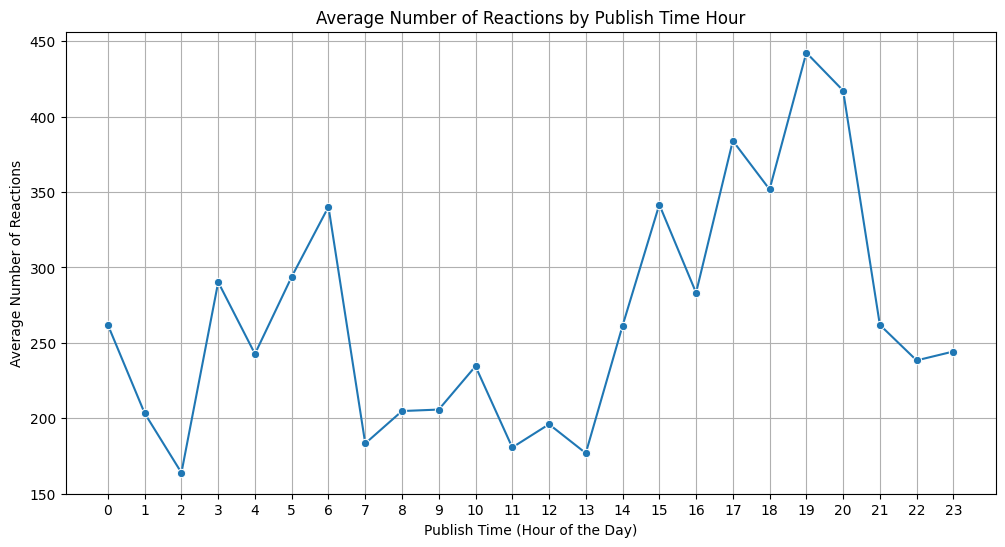

In [ ]:
##Line chart for Num of reactions vs Time of upload (Time is sequential so line chart shows trend better)
df['publish_time_Hour']=df['status_published'].dt.hour
avg_reactions_by_hour=df.groupby('publish_time_Hour')['num_reactions'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='publish_time_Hour',y='num_reactions',data=avg_reactions_by_hour,marker='o')
plt.title('Average Number of Reactions by Publish Time Hour')
plt.xlabel('Publish Time (Hour of the Day)')
plt.ylabel('Average Number of Reactions')
plt.xticks(range(0,24))
plt.grid()
plt.show()


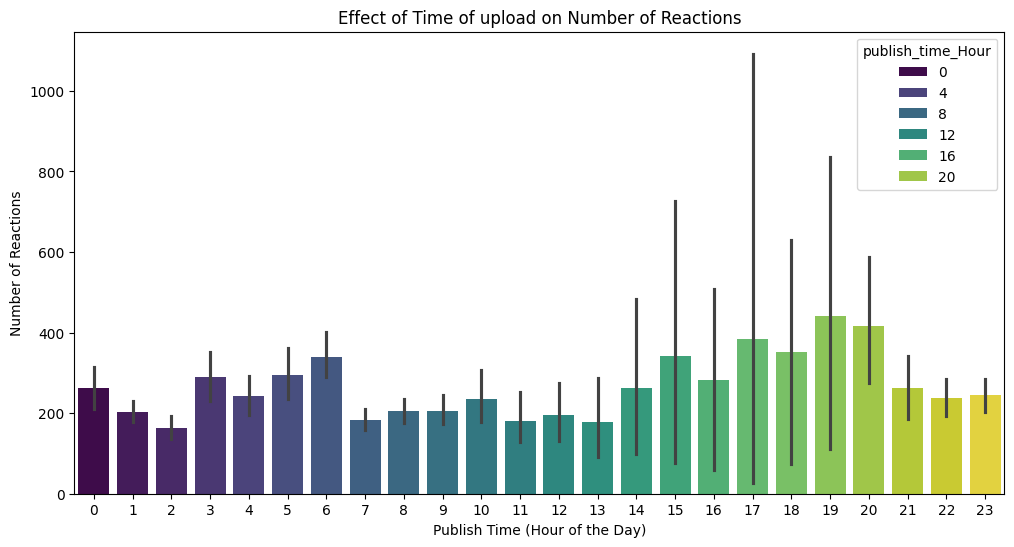

In [ ]:
#Analyze How does the time of upload affects the number of reaction using bar plot for better visualization
plt.figure(figsize=(12,6))
sns.barplot(x='publish_time_Hour',y='num_reactions',data=df,hue='publish_time_Hour',estimator=np.mean,palette='viridis')
plt.title('Effect of Time of upload on Number of Reactions')
plt.xlabel('Publish Time (Hour of the Day)')
plt.ylabel('Number of Reactions')
plt.show()

### Correlation between number of reactions and other engagement metrics such as comments and share

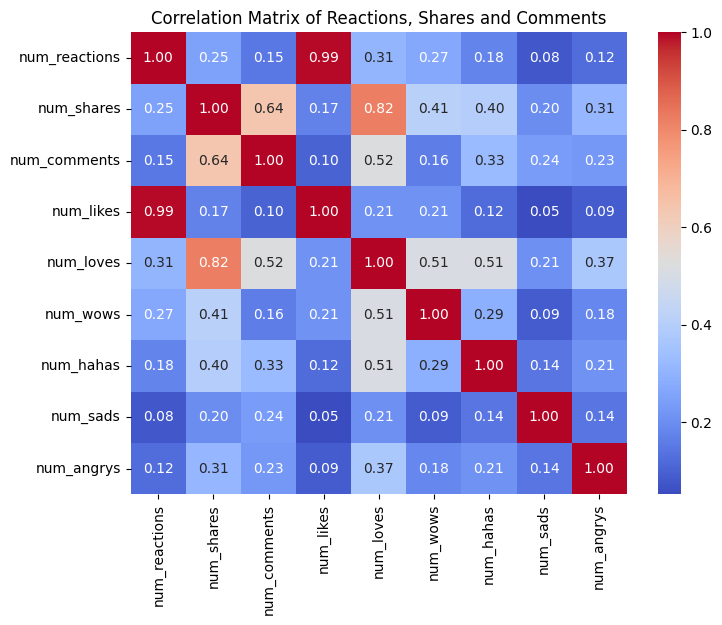

In [ ]:
#Correlation matrix
#Choose columns num_reactions,num_shares and num_comments etc. for correlation analysis
correlation_df=df[['num_reactions','num_shares','num_comments','num_likes','num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys']]
correlation_matrix=correlation_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f",cbar=True,xticklabels=True,yticklabels=True)
plt.title('Correlation Matrix of Reactions, Shares and Comments')
plt.show()


###  Show the Most engagement status type

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_1372\1846483300.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='status_type',y='Total_engagements',data=avg_reactions_status_type,palette='magma')


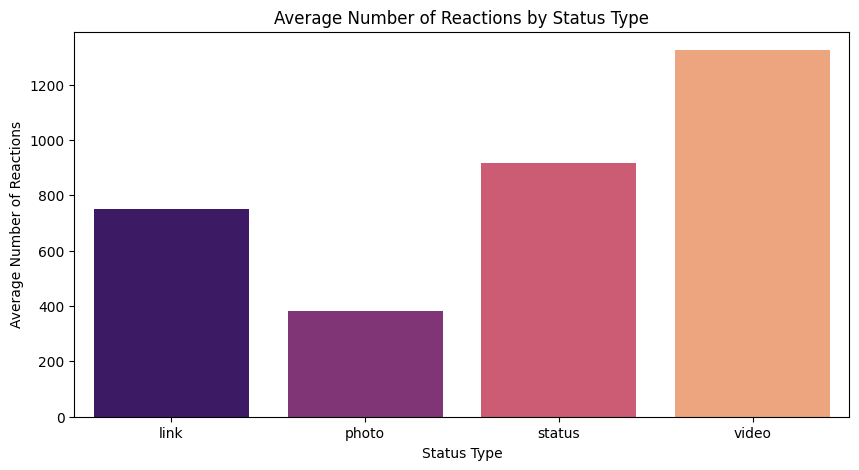

In [32]:
df['Total_engagements']=df['num_reactions']+df['num_comments']+df['num_shares']+df['num_likes']+df['num_loves'] +df['num_wows'] +df['num_hahas'] +df['num_sads'] +df['num_angrys']
avg_reactions_status_type=df.groupby('status_type')['Total_engagements'].mean().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x='status_type',y='Total_engagements',data=avg_reactions_status_type,palette='magma')
plt.title('Average Number of Reactions by Status Type')
plt.xlabel('Status Type')
plt.ylabel('Average Number of Reactions')
plt.show()

### Step 5- Training Machine Learning Model

### K-Means Clustering Model

In [33]:
X=df[['status_type','num_reactions','num_shares','num_comments', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys']]
#Using One Hot Encoding for categorical variable 'status_type'
X=pd.get_dummies(X,columns=['status_type'],drop_first=True)
#Using Standard Scaler to scale the features
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


### Using Elbow method to find the optimal number of clusters

In [ ]:
wcss=[]
for i in range(1,21):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

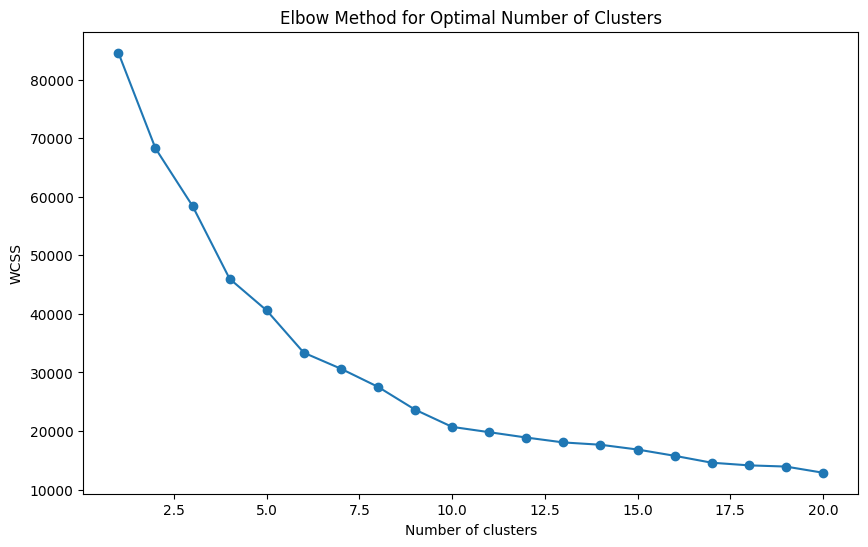

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21),wcss,marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [36]:
#Taking 6 as the optimal number of clusters
kmeans=KMeans(n_clusters=6,random_state=42)
y_kmeans=kmeans.fit_predict(X_scaled)
df['Cluster']=y_kmeans
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,publish_time_Hour,Total_engagements,Cluster
0,1,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,6,1832,4
1,2,photo,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,22,300,0
2,3,video,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,6,747,4
3,4,photo,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2,222,0
4,5,photo,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,3,426,0


### Count of different Number of posts in the dataset


In [37]:
##get the no. of each post in the dataset
df['status_type'].value_counts()

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64

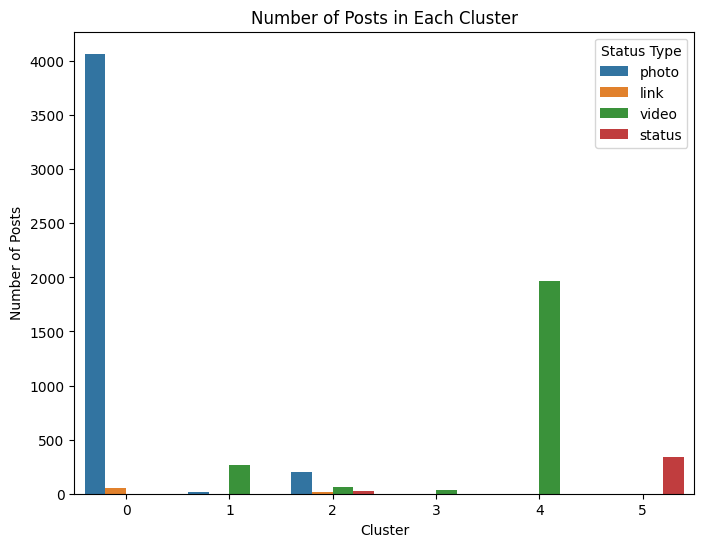

In [38]:
## Plot the number of posts (status type) in each cluster 
plt.figure(figsize=(8,6))
sns.countplot(x='Cluster', hue='status_type', data=df)
plt.title('Number of Posts in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Posts')
plt.legend(title='Status Type')
plt.show()

### Average value of no. of reactions ,comments,shares for each post type

In [39]:
#Get the average number of reactions, shares and comments in each post type
cluster_summary=df.groupby('status_type').agg({'num_reactions':'mean','num_shares':'mean','num_comments':'mean'}).reset_index()
print(cluster_summary)

  status_type  num_reactions  num_shares  num_comments
0        link     370.142857    4.396825      5.698413
1       photo     181.290345    2.553871     15.993470
2      status     438.783562    2.558904     36.238356
3       video     283.409597  115.679949    642.478149


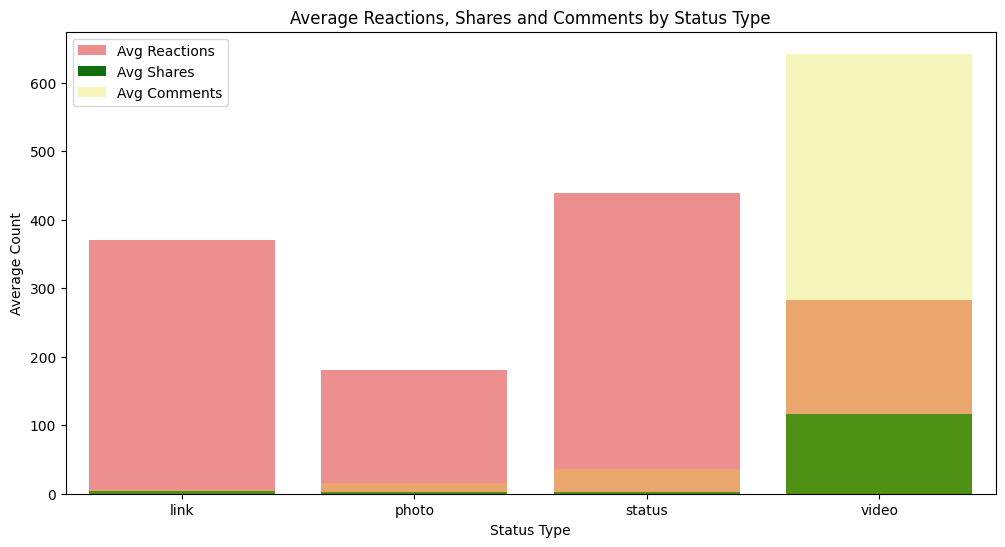

In [52]:
##Grouped bar chart for average reactions, shares and comments by status type
plt.figure(figsize=(12,6))
sns.barplot(x='status_type',y='num_reactions',data=cluster_summary,color='red',label='Avg Reactions',alpha=0.5)
sns.barplot(x='status_type',y='num_shares',data=cluster_summary,color='green',label='Avg Shares',alpha=1)
sns.barplot(x='status_type',y='num_comments',data=cluster_summary,color='yellow',label='Avg Comments',alpha=0.3)
plt.title('Average Reactions, Shares and Comments by Status Type')  
plt.xlabel('Status Type')
plt.ylabel('Average Count')
plt.legend()
plt.show()